## Investigating a time-varying criminal network
The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in phase1.csv, phase2.csv,  correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at  million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. 

In the data files (phase1.csv, phase2.csv, ), there are matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. I will analyze this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

Import caviar network data and store as 12 seperate graphs, renaming actor as n1-n120 using python package networkx

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

phases = {}
G = {}
dG = {}
for i in range(1,12):
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  dG[i] = nx.from_pandas_adjacency(phases[i], create_using = nx.DiGraph())
  dG[i].name = var_name

In [6]:
# look at nodes and edges in each graph
for i in range(1,12):
  print("Graph", i, "has", G[i].number_of_nodes(), "nodes and", G[i].number_of_edges(), "edges")

Graph 1 has 15 nodes and 18 edges
Graph 2 has 24 nodes and 28 edges
Graph 3 has 33 nodes and 56 edges
Graph 4 has 33 nodes and 48 edges
Graph 5 has 32 nodes and 39 edges
Graph 6 has 27 nodes and 47 edges
Graph 7 has 36 nodes and 49 edges
Graph 8 has 42 nodes and 58 edges
Graph 9 has 34 nodes and 44 edges
Graph 10 has 42 nodes and 50 edges
Graph 11 has 41 nodes and 50 edges


In [8]:
print(nx.to_pandas_adjacency(G[1]))
print(phases[1])


      n1   n4  n89  n83   n3   n5  n88  n85  n90   n2   n7  n54   n6  n64   n8
n1   0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0
n4   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n89  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
n83  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
n3   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n5   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n88  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
n85  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
n90  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n2   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n7   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
n54  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [35]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

zsh:1: command not found: apt-get
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [51 lines of output]
      /opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-10.9-x86_64-cpython-39/pygraphviz
      copying pygraphviz/scraper.py -> build/lib.macosx-10.9-x86_64-cpython-39/pygraphviz
      copying pygraphviz/graphviz.py -> build/lib.macosx-10.9-x86_64-cpython-39/pygraphviz
      copying pygraphviz/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-39/pygraphviz
      copying pygraphviz/agraph.py -> build/lib.macosx-10.9-x86_64-cpython-39/pygraphviz
      copying pygraphviz/testing.py -> build/lib.macosx-10.9-x86_64-cpyth

### Lets visualize graphs of each phase, both undirected and directed

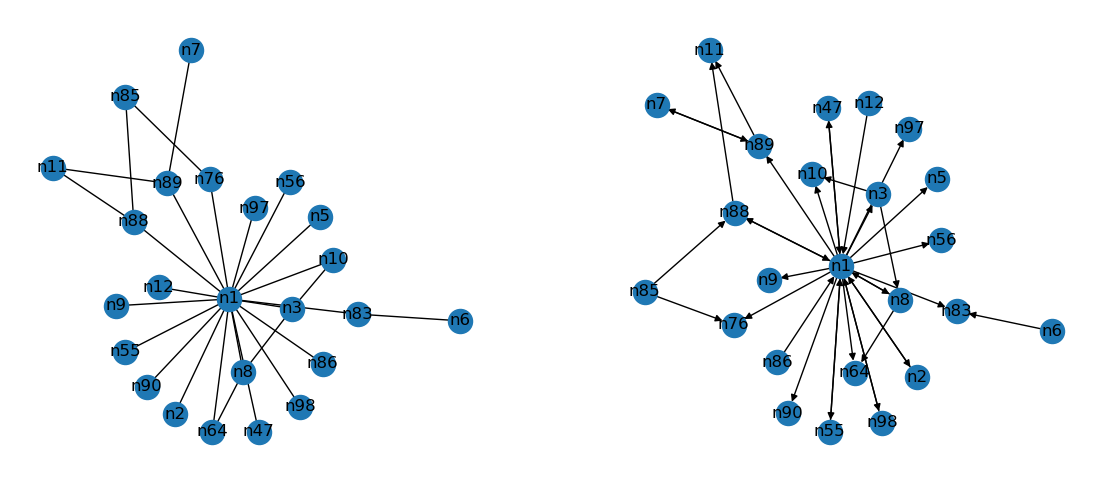

In [37]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(G[2], pos=nx.drawing.nx_agraph.graphviz_layout(G[2]), ax=ax[0],with_labels=True)
nx.draw(dG[2], pos=nx.drawing.nx_agraph.graphviz_layout(dG[2]), ax=ax[1], with_labels=True)
plt.show()

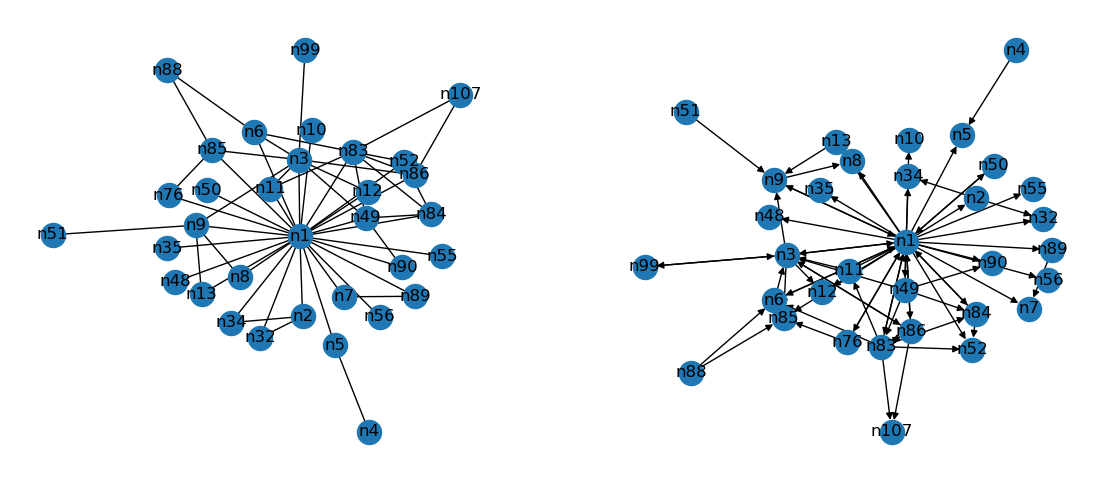

In [39]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), ax=ax[0],with_labels=True)
nx.draw(dG[3], pos=nx.drawing.nx_agraph.graphviz_layout(dG[3]), ax=ax[1], with_labels=True)
plt.show()

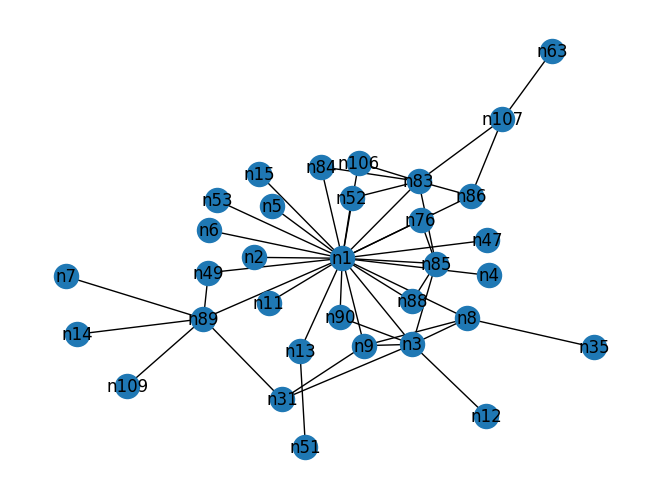

In [ ]:
nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels=True)

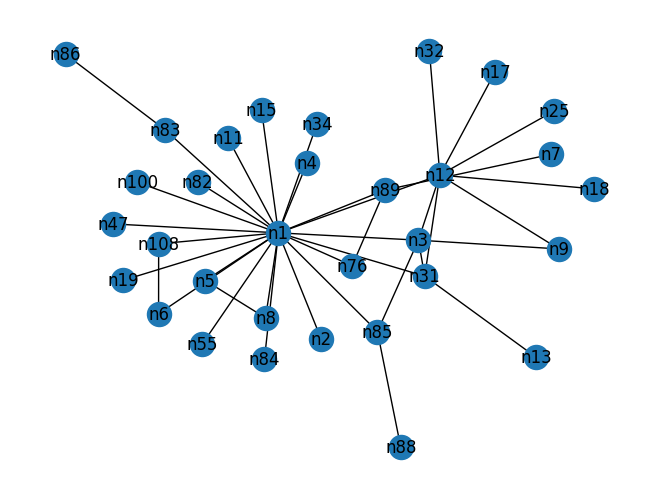

In [ ]:
nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels=True)

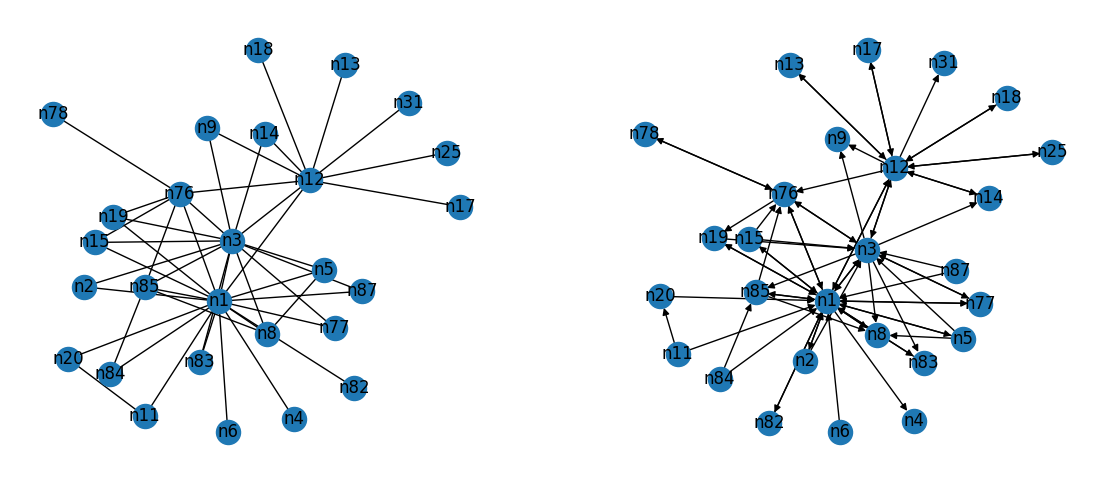

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(G[6], pos=nx.drawing.nx_agraph.graphviz_layout(G[6]), ax=ax[0],with_labels=True)
nx.draw(dG[6], pos=nx.drawing.nx_agraph.graphviz_layout(dG[6]), ax=ax[1], with_labels=True)
plt.show()

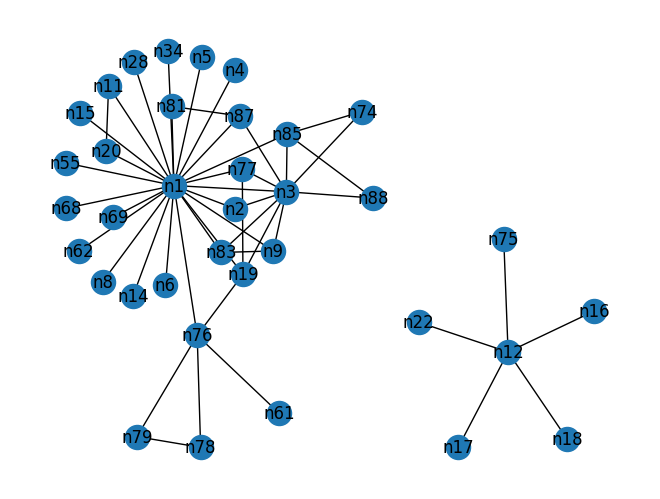

In [ ]:
nx.draw(G[7], pos=nx.drawing.nx_agraph.graphviz_layout(G[7]), with_labels=True)

In [ ]:
### Lets visualize graphs of phase 2 both undirected and directed

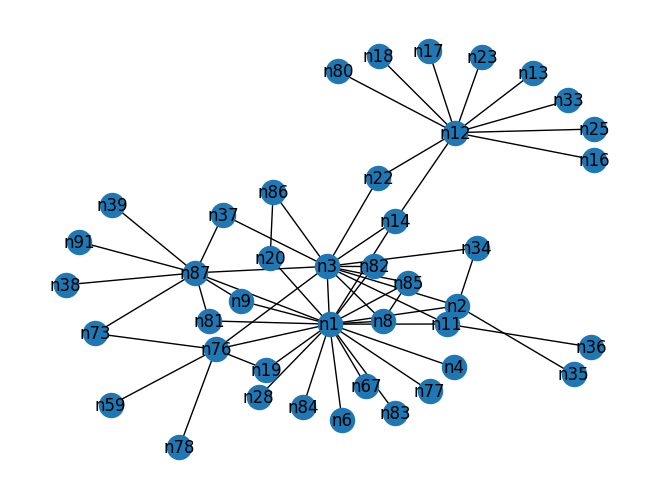

In [ ]:
nx.draw(G[8], pos=nx.drawing.nx_agraph.graphviz_layout(G[8]), with_labels=True)

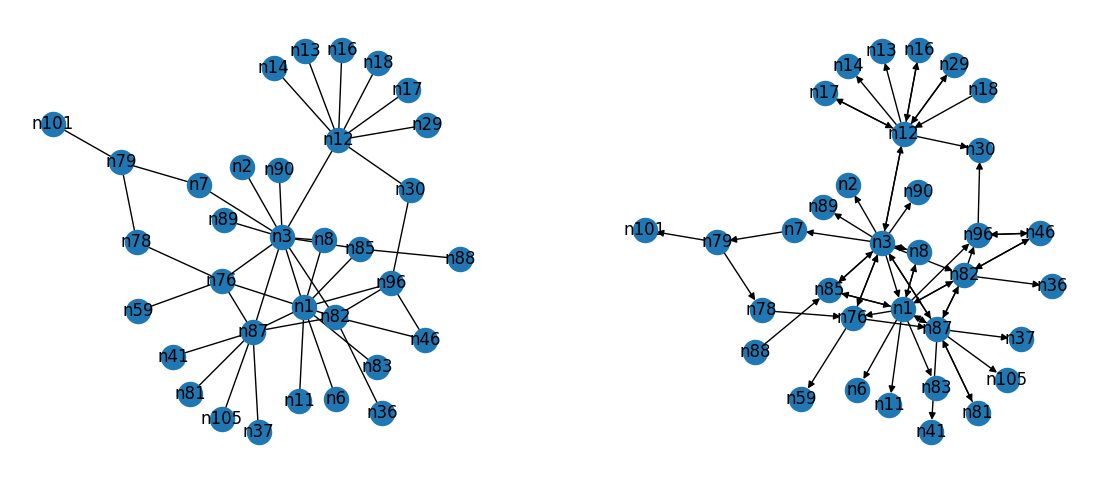

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(G[9], pos=nx.drawing.nx_agraph.graphviz_layout(G[9]), ax=ax[0],with_labels=True)
nx.draw(dG[9], pos=nx.drawing.nx_agraph.graphviz_layout(dG[9]), ax=ax[1], with_labels=True)
plt.show()

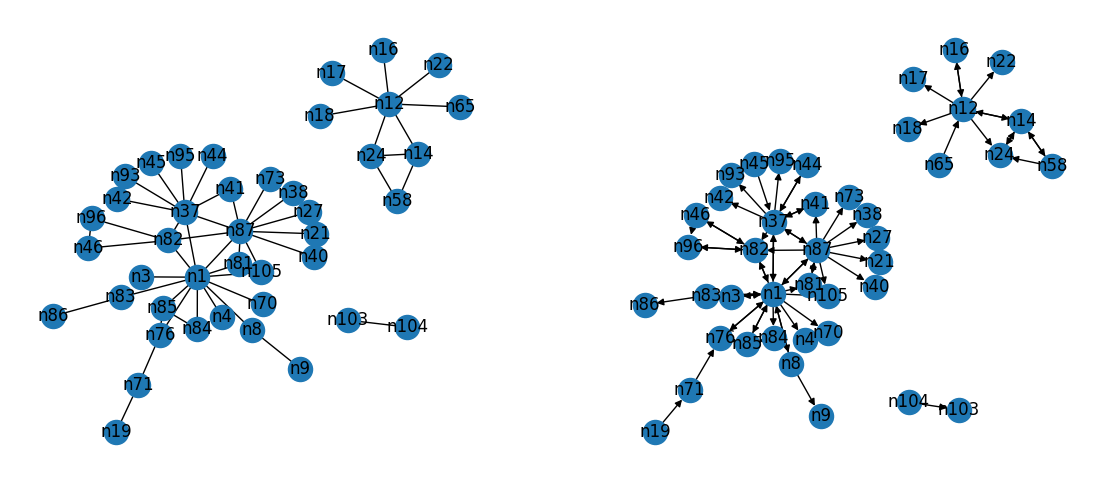

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(14, 6))
nx.draw(G[10], pos=nx.drawing.nx_agraph.graphviz_layout(G[10]), ax=ax[0],with_labels=True)
nx.draw(dG[10], pos=nx.drawing.nx_agraph.graphviz_layout(dG[10]), ax=ax[1], with_labels=True)
plt.show()

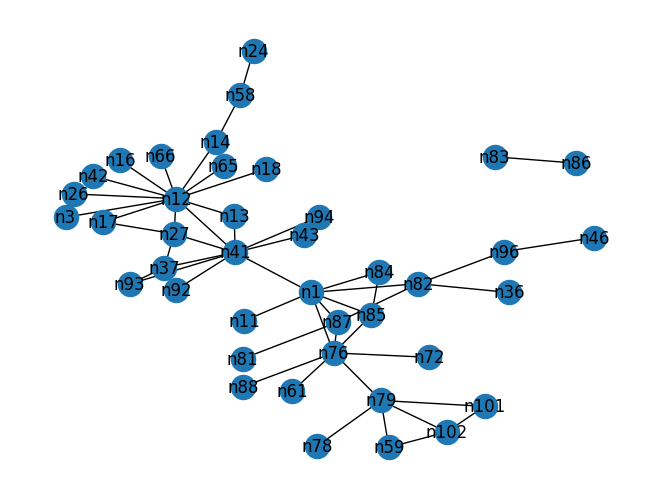

In [ ]:
nx.draw(G[11], pos=nx.drawing.nx_agraph.graphviz_layout(G[11]), with_labels=True)

In [45]:
#find degree centralities
print(nx.degree_centrality(G[3]))

{'n1': 0.84375, 'n4': 0.03125, 'n89': 0.0625, 'n83': 0.25, 'n3': 0.28125, 'n5': 0.0625, 'n48': 0.03125, 'n88': 0.0625, 'n85': 0.125, 'n90': 0.0625, 'n86': 0.125, 'n2': 0.09375, 'n7': 0.0625, 'n6': 0.125, 'n8': 0.0625, 'n55': 0.03125, 'n10': 0.03125, 'n56': 0.03125, 'n76': 0.0625, 'n9': 0.15625, 'n34': 0.0625, 'n35': 0.03125, 'n11': 0.09375, 'n32': 0.0625, 'n84': 0.125, 'n49': 0.15625, 'n107': 0.0625, 'n50': 0.03125, 'n99': 0.03125, 'n13': 0.0625, 'n51': 0.03125, 'n12': 0.0625, 'n52': 0.09375}


In [47]:
print(nx.degree_centrality(G[9])["n12"])

0.24242424242424243


In [49]:
#find betweeness
print(nx.betweenness_centrality(G[3], normalized = True)['n83'])

0.046572580645161295


In [ ]:
print(nx.betweenness_centrality(G[9], normalized = True)['n83'])

0.0


0.09178102356758051


In [51]:
#compute eigenvector centraility
for i in {'n1', 'n3', 'n12', 'n83'}:
  print(i, nx.eigenvector_centrality(G[3])[i])

n12 0.13599046901759537
n83 0.2774973009007579
n3 0.29130488767289103
n1 0.5938791958045414


In [53]:
for i in {'n1', 'n3', 'n12', 'n83'}:
  print(i, nx.eigenvector_centrality(G[9])[i])

n12 0.14065936326685183
n83 0.09178102356758051
n3 0.4679877147323067
n1 0.4589575176167989


## Calculating temporal censistency of centraility

Now lets determine the temporal consistency of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.



In [59]:
#make a structure to hold all player's centraility

central_set = set()
central_set.clear()

for i in range(1,12):
  central_set = central_set.union(G[i].nodes)

central_list = list(central_set)
central_dict = dict.fromkeys(central_list, 0)

#for each player add centrality for each network and then divide by number of networks, if player is not in network score 0

for i in range(1,12):
  between = nx.betweenness_centrality(G[i], normalized = True)
  #print("1st", central_dict)
  for key in between:

    central_dict[key] = central_dict[key] + between[key]
  #print("2nd", central_dict)
#print(central_dict)
for key in central_dict:
  central_dict[key] = central_dict[key]/12
print(sorted(central_dict.items(), key=lambda x:x[1], reverse= True))


[('n1', 0.6004634096021256), ('n12', 0.15359861350396828), ('n3', 0.1186192879838379), ('n76', 0.07680871508053998), ('n87', 0.056216350229755886), ('n41', 0.046171652421652415), ('n89', 0.04395274973487632), ('n14', 0.029948405253283305), ('n83', 0.029135851283926654), ('n82', 0.026763358451620648), ('n85', 0.021755315078670363), ('n79', 0.02011217948717949), ('n37', 0.01462155166423459), ('n88', 0.011399129057789647), ('n8', 0.008405648272429822), ('n7', 0.007312710437710438), ('n96', 0.007201623607873607), ('n9', 0.006858438940092165), ('n86', 0.006456979100320955), ('n22', 0.0064024390243902435), ('n31', 0.006384408602150538), ('n5', 0.005208333333333333), ('n13', 0.005208333333333333), ('n107', 0.005208333333333333), ('n2', 0.00469105144680479), ('n11', 0.004681212891754061), ('n58', 0.003952991452991453), ('n6', 0.003693528693528694), ('n71', 0.002947154471544715), ('n78', 0.002156986531986532), ('n27', 0.0019943019943019944), ('n30', 0.0016571969696969697), ('n19', 0.00093370681

In [63]:
central_set.clear()
central_set = set()

for i in range(1,12):
  central_set = central_set.union(G[i].nodes)
central_list = list(central_set)
central_dict = dict.fromkeys(central_list, 0)

#for each player add centrality for each network and then divide by number of networks, if player is not in network score 0
for i in range(1,12):
  eigen = nx.eigenvector_centrality(G[i])

  for key in eigen:

    central_dict[key] = central_dict[key] + eigen[key]

#print(central_dict)
for key in central_dict:
  central_dict[key] = central_dict[key]/12
print(sorted(central_dict.items(), key=lambda x:x[1], reverse= True))
#print(central_dict["n10"])

[('n1', 0.5008584896356972), ('n3', 0.2732534412100939), ('n85', 0.1747274978159332), ('n76', 0.1520543240911354), ('n83', 0.14072831915855025), ('n8', 0.13969447871313243), ('n12', 0.13006890957012815), ('n87', 0.12932340129611178), ('n2', 0.10477664852027468), ('n9', 0.09229034524463707), ('n82', 0.09172765543305728), ('n6', 0.08922469544787658), ('n11', 0.08496616288237778), ('n88', 0.07919021944680645), ('n5', 0.07840293436015643), ('n84', 0.0750765225238226), ('n89', 0.07182432425574858), ('n37', 0.06508059463729773), ('n4', 0.0649638889242332), ('n41', 0.05854701405246807), ('n19', 0.056725863946499054), ('n90', 0.056539307406433016), ('n86', 0.05330767702871844), ('n13', 0.04776907980787106), ('n81', 0.047697165211042676), ('n14', 0.04738922241666177), ('n15', 0.04379631669409045), ('n55', 0.038429472952805944), ('n77', 0.037203767757415275), ('n34', 0.03678415694299055), ('n27', 0.03401740381628734), ('n31', 0.032414066170550614), ('n47', 0.03108591000350751), ('n49', 0.0301478

In [ ]:
print()
g4 = set(G[4].nodes)
g5 = set(G[5].nodes)
print(g4.difference(g5))
print(g5.difference(g4))


{'n109', 'n49', 'n52', 'n107', 'n63', 'n90', 'n53', 'n14', 'n35', 'n51', 'n106'}
{'n100', 'n34', 'n55', 'n108', 'n18', 'n17', 'n32', 'n19', 'n25', 'n82'}


In [ ]:
between4 = nx.betweenness_centrality(G[4], normalized = True)
between5 = nx.betweenness_centrality(G[5], normalized = True)
print(sorted(between4.items(), key=lambda x:x[1], reverse= True))
print(sorted(between5.items(), key=lambda x:x[1], reverse= True))

[('n1', 0.8393097158218126), ('n89', 0.19621255760368667), ('n3', 0.09043778801843318), ('n83', 0.0795890937019969), ('n8', 0.0625), ('n107', 0.0625), ('n13', 0.0625), ('n86', 0.04742703533026112), ('n85', 0.016537058371735792), ('n9', 0.01476094470046083), ('n31', 0.012096774193548387), ('n4', 0.0), ('n5', 0.0), ('n88', 0.0), ('n90', 0.0), ('n2', 0.0), ('n7', 0.0), ('n6', 0.0), ('n47', 0.0), ('n76', 0.0), ('n35', 0.0), ('n11', 0.0), ('n53', 0.0), ('n84', 0.0), ('n49', 0.0), ('n51', 0.0), ('n63', 0.0), ('n109', 0.0), ('n12', 0.0), ('n14', 0.0), ('n52', 0.0), ('n106', 0.0), ('n15', 0.0)]
[('n1', 0.8838709677419355), ('n12', 0.2698924731182796), ('n89', 0.06451612903225806), ('n83', 0.06451612903225806), ('n85', 0.06451612903225806), ('n31', 0.06451612903225806), ('n3', 0.04408602150537634), ('n4', 0.0), ('n5', 0.0), ('n88', 0.0), ('n86', 0.0), ('n2', 0.0), ('n7', 0.0), ('n6', 0.0), ('n8', 0.0), ('n55', 0.0), ('n47', 0.0), ('n76', 0.0), ('n9', 0.0), ('n34', 0.0), ('n11', 0.0), ('n32', 0.

In [ ]:
eigen4 = nx.eigenvector_centrality(G[4])
eigen5 = nx.eigenvector_centrality(G[5])
print(sorted(eigen4.items(), key=lambda x:x[1], reverse= True))
print(sorted(eigen5.items(), key=lambda x:x[1], reverse= True))

[('n1', 0.6103793611880546), ('n3', 0.2726301929204049), ('n83', 0.27101453049498864), ('n85', 0.25166093991419913), ('n9', 0.20590952719486624), ('n8', 0.19447742465332274), ('n86', 0.16621734240998515), ('n89', 0.16285731175574908), ('n90', 0.1529696362948273), ('n84', 0.15268960861181316), ('n52', 0.15268960861181316), ('n106', 0.15268960861181316), ('n88', 0.14933693215094906), ('n76', 0.14933693215094906), ('n49', 0.13395296904541074), ('n31', 0.11111414552030667), ('n13', 0.10901142487376438), ('n4', 0.10573987873923835), ('n5', 0.10573987873923835), ('n2', 0.10573987873923835), ('n6', 0.10573987873923835), ('n47', 0.10573987873923835), ('n11', 0.10573987873923835), ('n53', 0.10573987873923835), ('n15', 0.10573987873923835), ('n107', 0.07808832018945693), ('n12', 0.047229757555588996), ('n35', 0.03369081256047083), ('n7', 0.028213090306172424), ('n109', 0.028213090306172424), ('n14', 0.028213090306172424), ('n51', 0.01888493394629366), ('n63', 0.013527733798172058)]
[('n1', 0.640

In [ ]:
between4['n31']

0.012096774193548387

In [65]:

central_set = set()
central_set.clear()
for i in range(1,12):
  central_set = central_set.union(G[i].nodes)
central_list = list(central_set)
central_dict = dict.fromkeys(central_list, 0)

#for each player add centrality for each network and then divide by number of networks, if player is not in network score 0
for i in range(1,12):
  degree = nx.degree_centrality(G[i])

  for key in degree:

    central_dict[key] = central_dict[key] + degree[key]

#print(central_dict)
for key in central_dict:
  central_dict[key] = central_dict[key]/12
print(sorted(central_dict.items(), key=lambda x:x[1], reverse= True))
#print(central_dict["n10"])

[('n1', 0.551361463571017), ('n3', 0.20487956834914897), ('n12', 0.15665197443640255), ('n85', 0.10817586587419696), ('n76', 0.10288232579136695), ('n83', 0.08784924318968677), ('n87', 0.08273887359253214), ('n8', 0.06823786213378026), ('n88', 0.05715441835708315), ('n89', 0.05419742910977132), ('n9', 0.05208770702054192), ('n6', 0.05002136211883116), ('n2', 0.04450790306608218), ('n82', 0.04360579100941021), ('n11', 0.04222952352762841), ('n84', 0.034987656095543586), ('n5', 0.03476075044053656), ('n86', 0.032721421424417606), ('n37', 0.0311329761024883), ('n14', 0.030282416601014165), ('n19', 0.02792492715781465), ('n41', 0.02534029317565903), ('n7', 0.025126746451693854), ('n13', 0.02503440643192807), ('n4', 0.02350000756521213), ('n79', 0.022754329004329003), ('n90', 0.022517488550097248), ('n31', 0.021770316377171212), ('n17', 0.019031212471417036), ('n96', 0.01833271741808327), ('n49', 0.018229166666666668), ('n81', 0.01750057192130363), ('n15', 0.017288675706014417), ('n78', 0.0


### Compute the hub and authority score of each actor, and for each phase.

In [ ]:
for i in range(1,12):
  print("Phase",i)
  print("n1. hub:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[0]['n1'],"authority:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[1]['n1'])
  print("n3. hub:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[0]['n3'],"authority:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[1]['n3'])
  if "n12" in dG[i]:
    print("n12. hub:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[0]['n12'],"authority:", nx.algorithms.link_analysis.hits(dG[i], max_iter=1000000)[1]['n12'])

Phase 1
n1. hub: 0.4216570320620086 authority: 0.07910149056463381
n3. hub: 0.0944775876857564 authority: 0.09465346744036278
Phase 2
n1. hub: 0.6730461473415296 authority: 0.006215642713498496
n3. hub: 0.08576021405393171 authority: 0.05613489183442583
n12. hub: 0.004211365087558257 authority: 4.1862405230476434e-19
Phase 3
n1. hub: 0.3597120696002089 authority: 0.043209914224582986
n3. hub: 0.08457958713752071 authority: 0.05087386426499811
n12. hub: -0.0 authority: 0.03793012137431729
Phase 4
n1. hub: 0.36136627250986436 authority: 0.041497451640955405
n3. hub: 0.08930239500501046 authority: 0.05049570061752185
n12. hub: 0.020340328738608967 authority: 0.009170058501138896
Phase 5
n1. hub: 0.4306980738280467 authority: 0.030840336831043844
n3. hub: 0.0840097688646314 authority: 0.059293160878327346
n12. hub: 0.07339324032750127 authority: 0.0677157895899687
Phase 6
n1. hub: 0.09909912085791664 authority: 0.18229305904210127
n3. hub: 0.09934405001911646 authority: 0.1237428152126849


In [67]:
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [88]:
pos3 = nx.spring_layout(dG[3], seed=675)
pos4 = nx.spring_layout(dG[4], seed=675)
pos5 = nx.spring_layout(dG[5], seed=675)

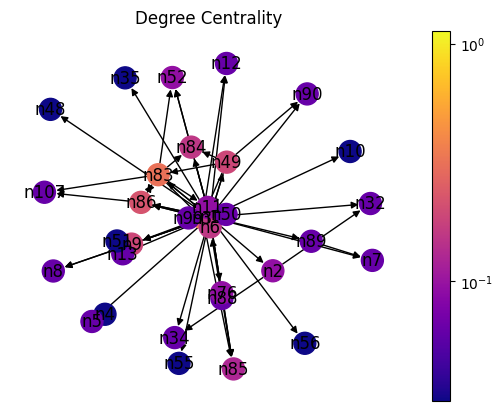

In [90]:
draw(dG[3], pos3, nx.degree_centrality(dG[3]), 'Degree Centrality')

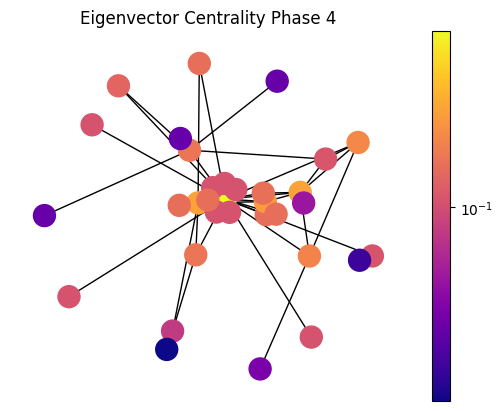

In [101]:
draw(G[4], pos4, nx.eigenvector_centrality(G[4]), 'Eigenvector Centrality Phase 4')

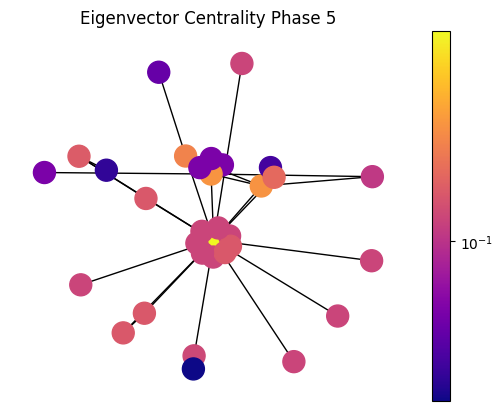

In [100]:
draw(G[5], pos5, nx.eigenvector_centrality_numpy(G[5]), 'Eigenvector Centrality Phase 5')

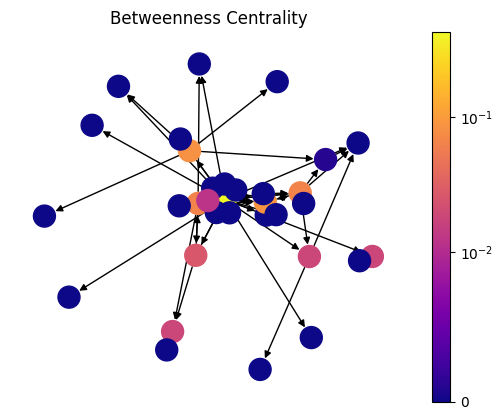

In [82]:
draw(dG[4], pos4, nx.betweenness_centrality(dG[4]), 'Betweenness Centrality Phase 5')

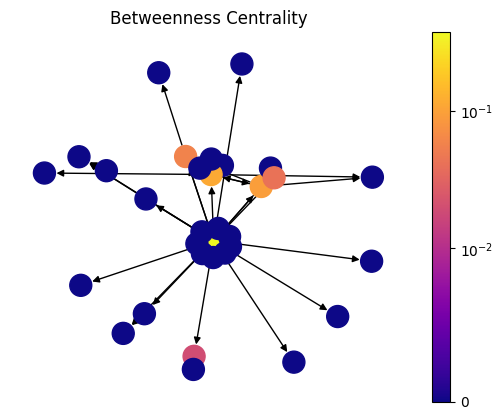

In [98]:
draw(dG[5], pos5, nx.betweenness_centrality(dG[5]), 'Betweenness Centrality')